AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

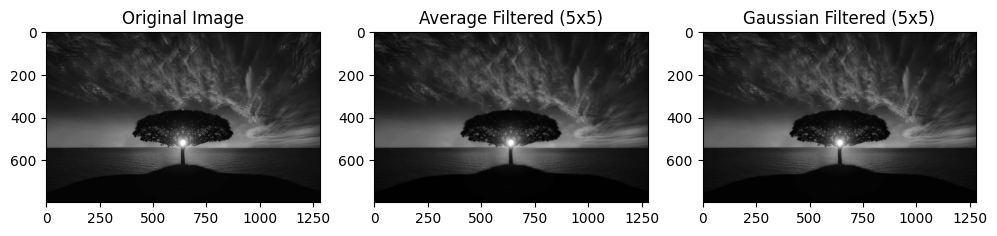

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = cv2.imread("tree.jpg")

original_image = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)

average_filtered = cv2.blur(original_image, (5, 5))

gaussian_filtered = cv2.GaussianBlur(original_image, (5, 5), 0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(average_filtered, cmap="gray")
plt.title("Average Filtered (5x5)")

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap="gray")
plt.title("Gaussian Filtered (5x5)")